In [103]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [104]:
df_house = pd.read_csv('kc_house_data.csv')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [105]:
df_house.shape

(21613, 21)

In [106]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [107]:
df_house.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [108]:
df_house.dtypes.value_counts()

int64      15
float64     5
object      1
Name: count, dtype: int64

In [109]:
df_house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [110]:
df_house.duplicated().sum()

0

In [111]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
df_house.drop('id', axis= 1, inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

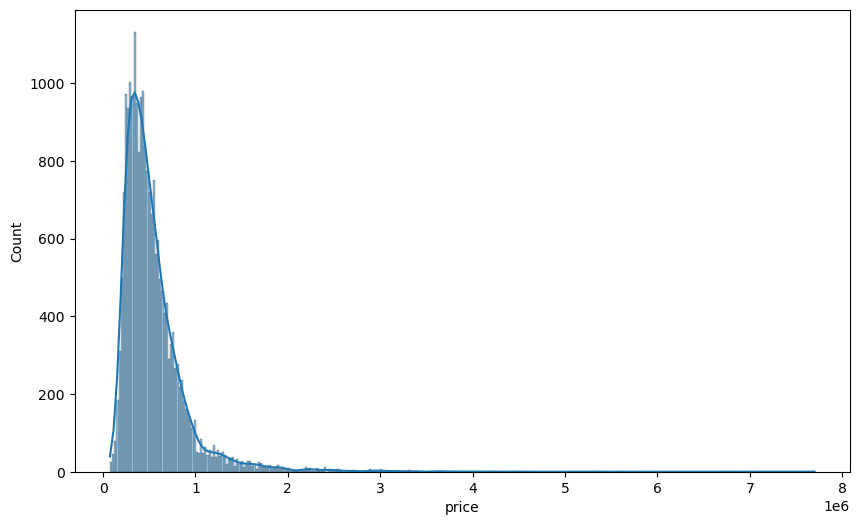

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(data= df_house, x='price', kde= True)

<Axes: xlabel='bedrooms', ylabel='count'>

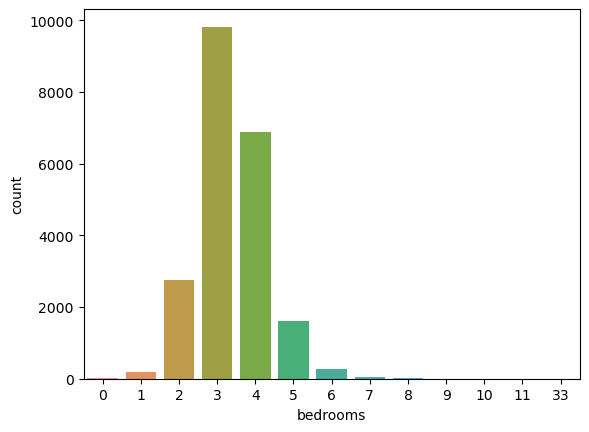

In [114]:
sns.countplot(data = df_house,  x= 'bedrooms')

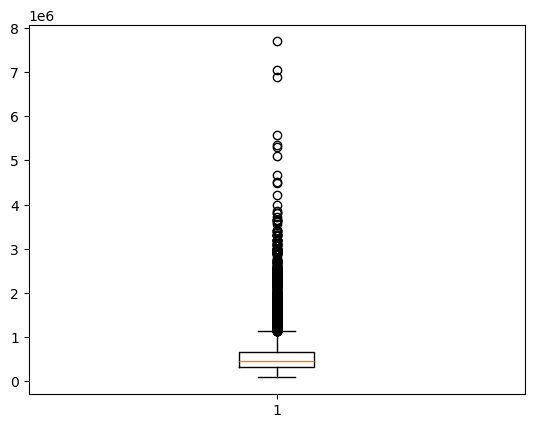

In [115]:
plt.boxplot(data= df_house, x=df_house['price'])
plt.show()

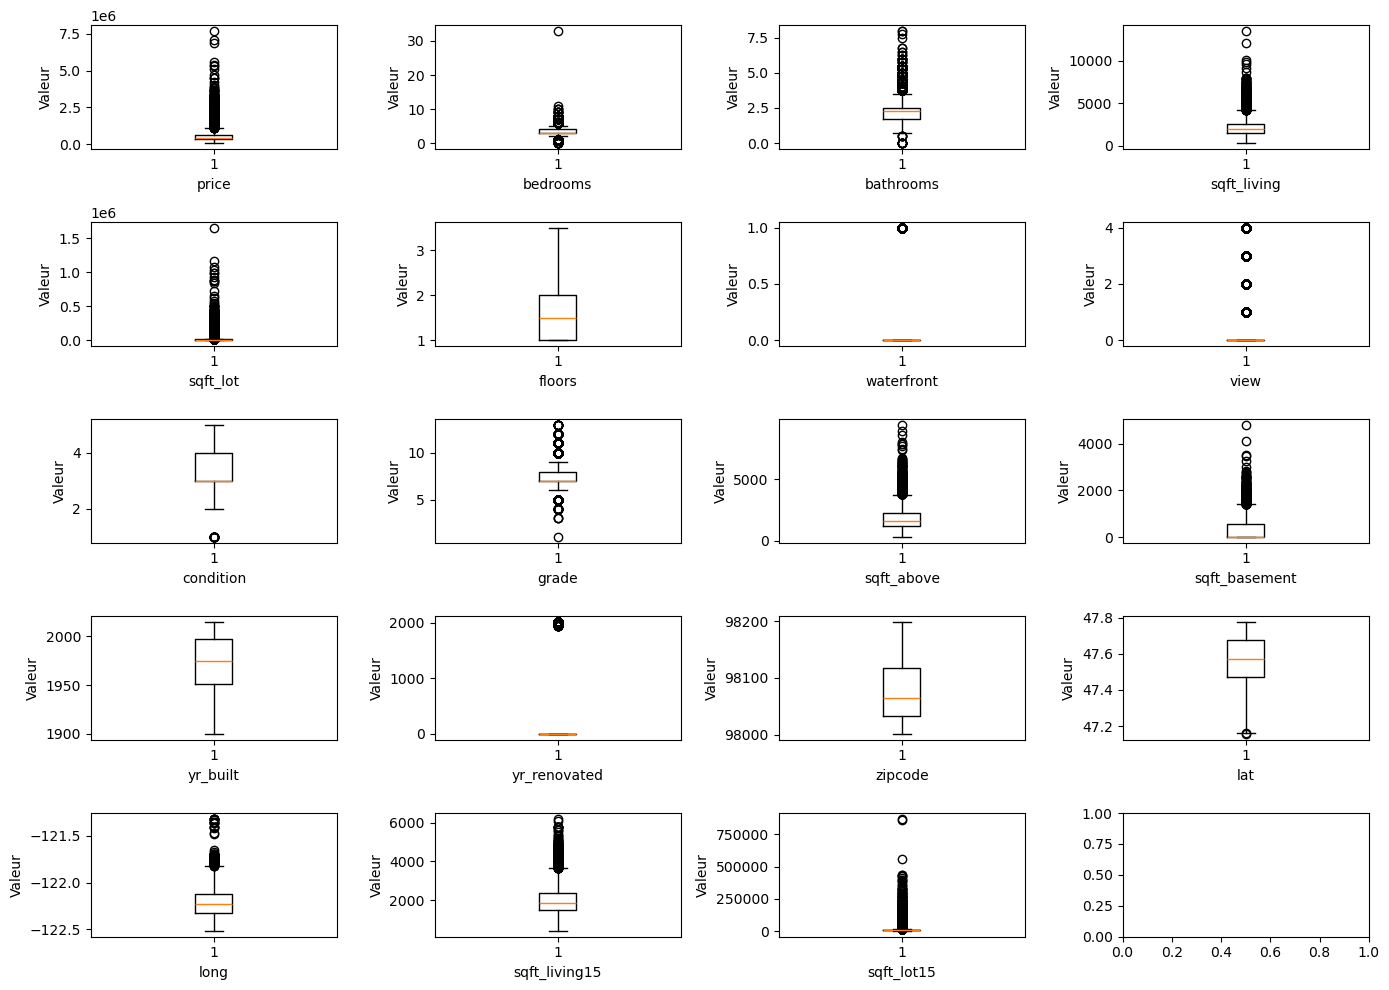

In [116]:
vars = df_house.select_dtypes(include=np.number).columns
# Création des subplots pour chaque variable 
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(14, 10))
axs = axs.flatten()
for i, var in enumerate(vars):
    axs[i].boxplot(df_house[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()

<Axes: >

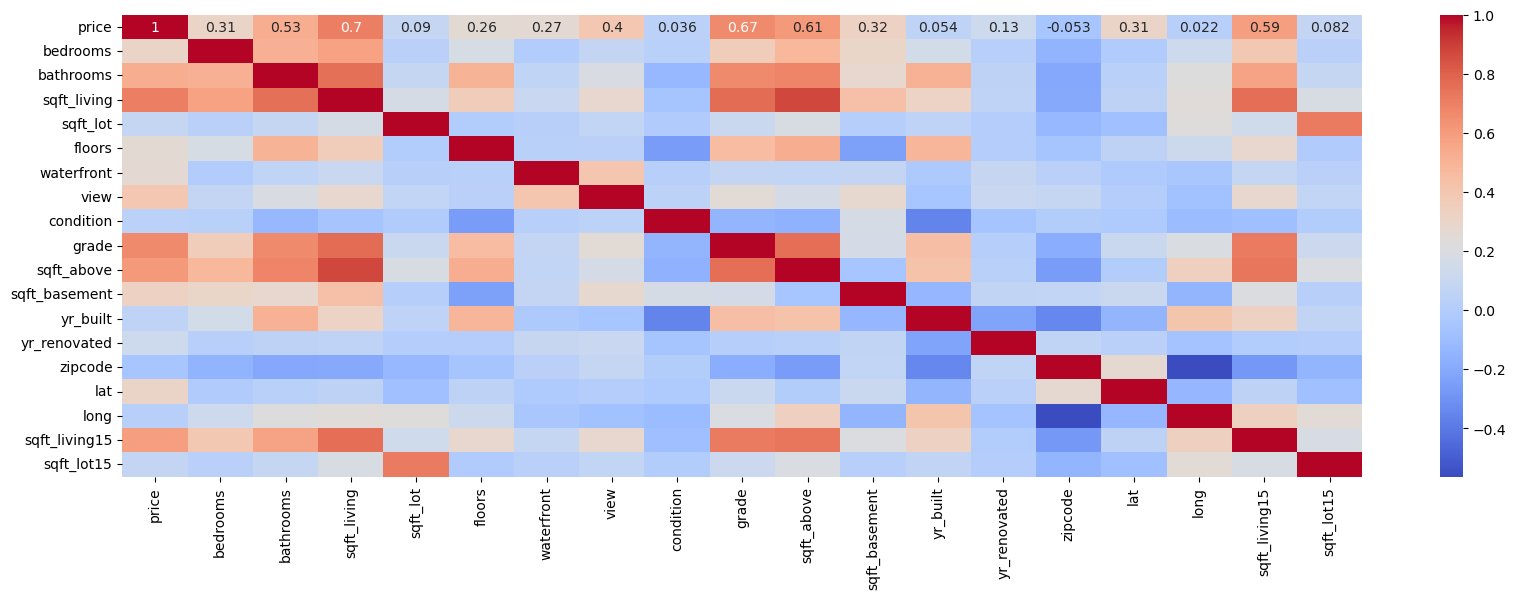

In [117]:
plt.figure(figsize=(20, 6))
corr = df_house.drop('date', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [118]:
#df_house.drop('date', axis=1)['price'].sort_values()

<Axes: xlabel='price', ylabel='sqft_living'>

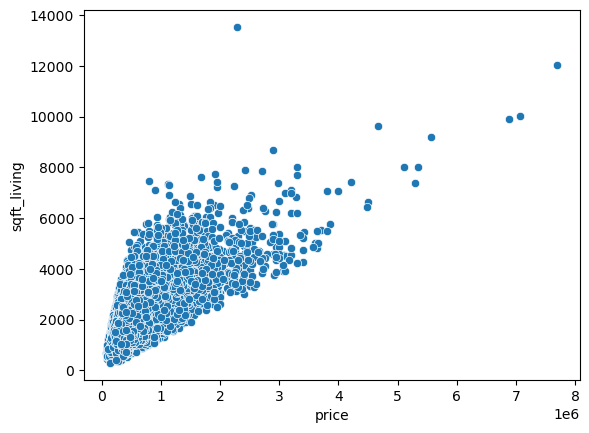

In [119]:
sns.scatterplot(x='price', y= 'sqft_living', data= df_house)

<Axes: xlabel='price', ylabel='sqft_above'>

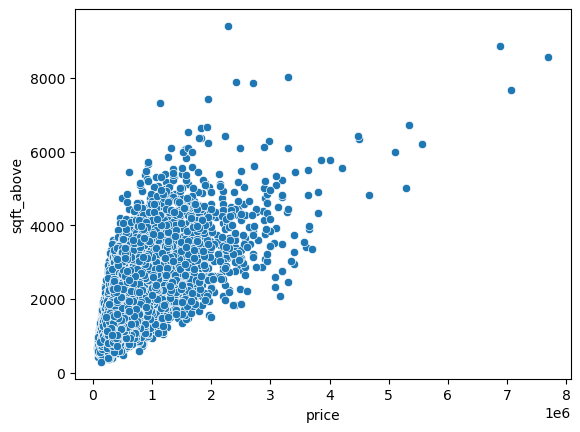

In [120]:
sns.scatterplot(x='price', y= 'sqft_above', data = df_house)

In [121]:
df_house['date'] = df_house['date'].apply(pd.to_datetime)

In [122]:
#df_house[ 'year' ] = df_house[ 'date' ].apply(lambda x: x.year)
#df_house[ 'year' ] = df_house[ 'date' ].apply(lambda x: x.month)

In [123]:
df_house.drop(['zipcode','date','lat','long','sqft_above','sqft_basement'], axis=1, inplace=True)

In [124]:
#df_house.drop(', axis=1, inplace=True)

In [125]:
def yr_renovated_process(x):
    if x == 0 :
        return 0
    return 1

In [126]:
df_house[ 'renovated' ] = df_house[ 'yr_renovated' ].apply(yr_renovated_process) 

In [127]:
df_house.drop('yr_renovated', axis=1, inplace = True)

In [128]:
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,1800,7503,0


In [129]:
#df_house.to_excel(excel_writer="output.xlsx")

Modèlisation 

ElasticNet

In [130]:
# Définir la variable explicative et la variable expliquée
X = df_house.drop('price', axis=1).values
y = df_house['price']

In [131]:
# Mise à échelle des features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [132]:
# Diviser en set d'entrainement et set de validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 12 )

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

#mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
#mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
#rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

#print("MAE:",mae)
#print("MSE:",mse)
#print("RMSE:",rmse)


In [137]:
#### ElasticNet, DecisionTreeRegressor

In [138]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score

In [139]:
# Créer un modèle de régression ElasticNet avec validation croisée de ElasticNetCV
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=3)

# Entrainement du modèle
model.fit(X_train, y_train)

# Trouver le meilleur alpha et le meilleur l1_ratio
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_

print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)

Meilleur alpha: 0.01
Meilleur l1_ratio: 0.9


In [140]:
model.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
             cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [141]:
# Prédiction sur les données de test
model_test_pred = model.predict(X_test)

In [142]:
# Calcul de mètriques : r2, rmse
model_test_r2 = r2_score(y_test, model_test_pred )
model_test_rmse = np.sqrt(mean_squared_error(y_test, model_test_pred ))

print(" R2 : ", model_test_r2)
print(" RMSE : ", model_test_rmse)

 R2 :  0.6422295209968821
 RMSE :  223382.54392895458


### Decision Tree

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

param_grid = {'max_depth': np.arange(1, 20)}

regressor= DecisionTreeRegressor(random_state=42) 
regressor.fit(X_train, y_train)

grid_regressor = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_regressor.fit(X_train, y_train)

print("Profondeur optimale :", grid_regressor.best_params_['max_depth'])

regressor_optimal = DecisionTreeRegressor(max_depth=grid_regressor.best_params_['max_depth'], random_state=42)
regressor_optimal.fit(X_train, y_train)

y_test_pred = regressor_optimal.predict(X_test)

Profondeur optimale : 6


In [147]:
df_house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'renovated'],
      dtype='object')

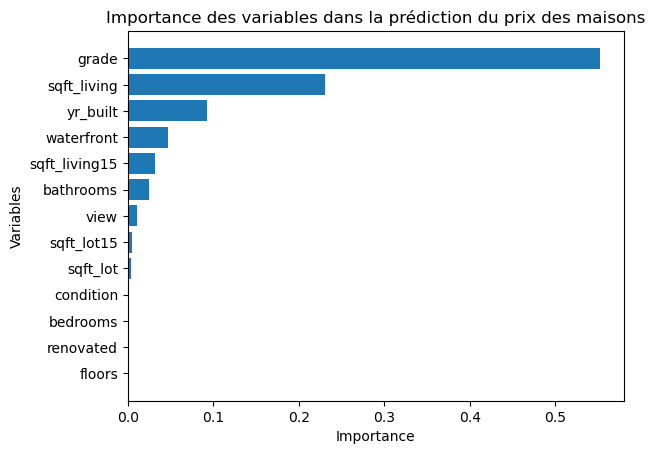

In [148]:
# Affichage de l'importance des variables

column_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'renovated']
importances = pd.Series(regressor_optimal.feature_importances_, index=column_names)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
print(r2, rmse, mae)


In [ ]:
# Rédumé des mètriques 
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'R2'], 
                        'Test': [r2, rmse,  mae]})
results.set_index('Métrique', inplace=True)
print(results)

In [ ]:
# Affichage de l'arbre
plt.figure(figsize=(14,8))
plot_tree(regressor_optimal, feature_names=X_train, filled=True)
plt.show()

- Modèle pour l'application 

In [155]:
# Définir la variable explicative et la variable expliquée en choisissant les features les plus importantes compte tenu de la régression optimale
X1= df_house[['grade', 'sqft_living', 'yr_built', 'waterfront','sqft_living15','bathrooms']].values
        
y1 = df_house['price']

In [156]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size =0.3, random_state = 12 )

In [157]:
model_regressor = DecisionTreeRegressor(max_depth=grid_regressor.best_params_['max_depth'], random_state=42)
model_regressor .fit(X_train1, y_train1)

predictions = model_regressor .predict(X_test1)

In [159]:
from sklearn.metrics import mean_absolute_error, r2_score

m_r2 = r2_score(y_test1, predictions )
m_rmse = np.sqrt(mean_squared_error(y_test1, predictions ))
m_mae = mean_absolute_error(y_test1, predictions )
print(m_r2, m_rmse, m_mae)

0.6708544492277706 214259.93839225982 136372.8902976338


In [ ]:
#from sklearn.metrics import mean_absolute_error, r2_score

#r2 = r2_score(y_test, y_test_pred)
#rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
#mae = mean_absolute_error(y_test, y_test_pred)
#print(r2, rmse, mae)


0.7869532443304014 172379.0344562447 91312.22730682882


In [ ]:
# Rédumé des mètriques 
#results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'R2'], 
#                        'Test': [r2, rmse,  mae]})
#results.set_index('Métrique', inplace=True)
#rint(results)

                   Test
Métrique               
RMSE           0.786953
MAE       172379.034456
R2         91312.227307


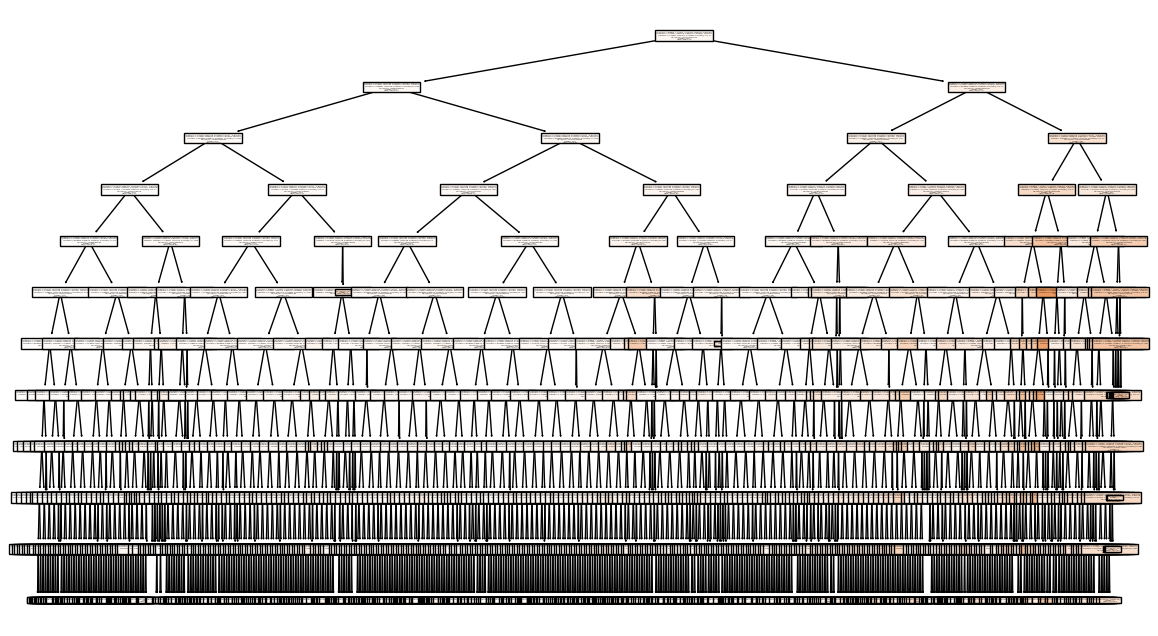

In [ ]:
# Affichage de l'arbre
#plt.figure(figsize=(14,8))
#plot_tree(regressor_optimal, feature_names=X_train, filled=True)
#plt.show()

In [ ]:
import pickle 

with open("model.pkl", "wb") as file :
    pickle.dump(model_regressor, file )

In [ ]:
import pickle 

with open("model1.pkl", "wb") as file :
    pickle.dump(model, file )